In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, sigmoid_kernel, rbf_kernel, polynomial_kernel, laplacian_kernel, cosine_similarity
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from parseit.data import load_pickle, save_pickle
import pandas as pd

pd.options.display.min_rows = 650
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

pickle_df = load_pickle("data-16k-dec-3-other-features.p")

Number of comments: 16840, number of words: 1051344


<AxesSubplot:xlabel='body', ylabel='wc'>

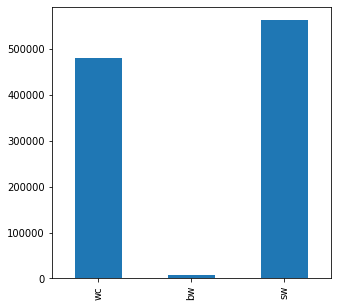

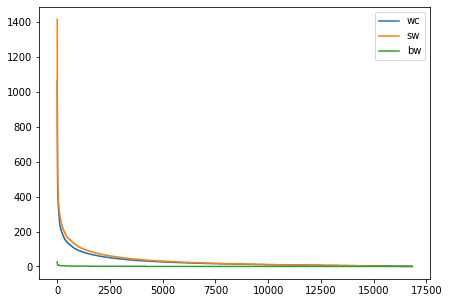

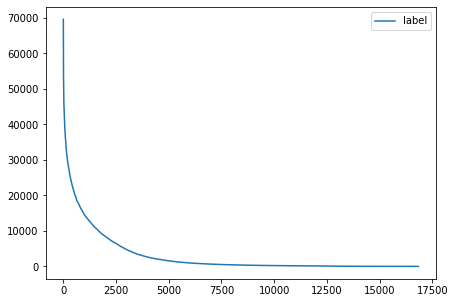

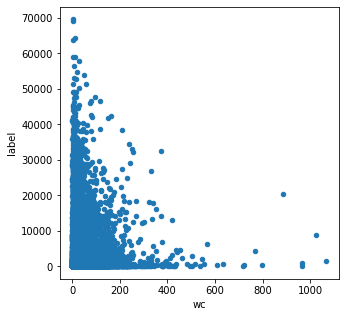

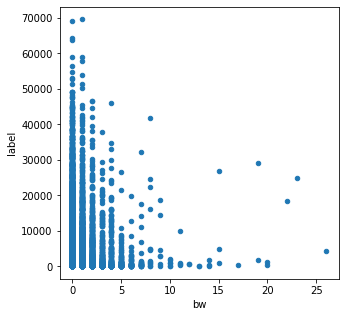

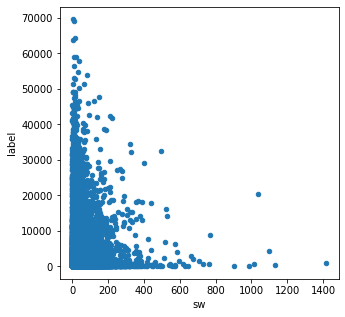

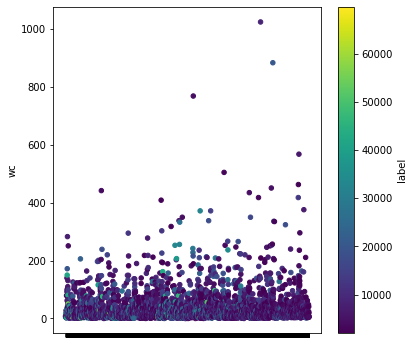

In [14]:
df = pickle_df.copy()

word_count_df = df[["wc", "bw", "sw"]]
sum_df = word_count_df.sum()
all_words = sum(sum_df)
print(f"Number of comments: {len(df)}, number of words: {all_words}")

# Pie chart and bar chart of word counts
#pd.DataFrame({"all_words": sum_df}).plot.pie(y="all_words", figsize=(5, 5))
sum_df.plot.bar(y="all_words", figsize=(5, 5))

# Line diagram of word counts
word_count_sorted = word_count_df[["wc"]].sort_values("wc", ascending=False).reset_index().drop("index", axis=1)
stop_word_count_sorted = word_count_df[["sw"]].sort_values("sw", ascending=False).reset_index().drop("index", axis=1)
bad_word_count_sorted = word_count_df[["bw"]].sort_values("bw", ascending=False).reset_index().drop("index", axis=1)
all_sorted = pd.concat([word_count_sorted, stop_word_count_sorted, bad_word_count_sorted], axis=1, sort=False)
all_sorted.plot.line(figsize=(7,5))

label_sorted = df[["label"]].sort_values("label", ascending=False).reset_index().drop("index", axis=1)
label_sorted.plot.line(figsize=(7,5))
#fig,ax = plt.subplots()
#ax.plot(all_sorted)
#ax.set_xlabel("number of comments",fontsize=11)
#ax.set_ylabel("count",fontsize=11)
#all_sorted.plot.line(figsize=(7, 5))
#ax2=ax.twinx()
#ax2.plot(label_sorted,color="blue")
#ax2.set_ylabel("label",fontsize=11)
#plt.legend(loc='best')
#plt.show()


# Scatter plots - scores in relation to counts
#df_sorted = df.sort_values("label", ascending=False).reset_index()
#pd.DataFrame({"word_count": df_sorted.word_count, "label": df_sorted.label}).plot.scatter(x='word_count', y='label', figsize=(5,5))

# these works good
#df.plot.scatter(x='wc', y='label', figsize=(5,5))
#df.plot.scatter(x='bw', y='label', figsize=(5,5))
#df.plot.scatter(x='sw', y='label', figsize=(5,5))
#df[df.label > 2000].plot.scatter(x=0, y='wc', c="label", figsize=(6,6), colormap='viridis')
#display(len(df[df.label > 100]))


#pd.DataFrame([sum_word_count, sum_stop_word_count, sum_bad_word_count], columns=["all_words", "stop_words", "bad_words"]).plot.pie()